#  Обратное распространение ошибки

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* http://cs231n.stanford.edu/handouts/linear-backprop.pdf
* https://www.adityaagrawal.net/blog/deep_learning/bprop_fc
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent

## Задачи для совместного разбора

In [ ]:
import torch as th

1\. Реализуйте обратное распространение ошибки для модели нейрона с квадратичной функцией потерь при условии, что на вход нейрону поступает вектор `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def forward(self, inputs): # <реализовать логику нейрона>
    return inputs @ self.weights + self.bias

  def backward(self, inputs, dldy):
    self.dw = dldy * inputs
    self.db = dldy

In [ ]:
class Loss:
  def forward(self, y_pred, y_true):
    self.loss_ = ((y_pred - y_true)**2)
    return ((y_pred - y_true)**2)

  def backward(self, y_pred, y_true): # dL/dy~
    self.dpred = 2 * (y_pred - y_true)

In [ ]:
x = th.tensor([2.0, 3.0])
y = th.tensor(5.0)
neuron = Neuron(
    weights=th.tensor([3.5, 4.5]),
    bias=0.5,
)

In [ ]:
criterion = Loss()
y_pred = neuron.forward(x)
loss = criterion.forward(y_pred, y)
criterion.backward(y_pred, y)
criterion.dpred

tensor(32.)

In [ ]:
neuron.backward(x, criterion.dpred)
neuron.dw, neuron.db

(tensor([64., 96.]), tensor(32.))

In [ ]:
y_pred

tensor(21.)

2\. Настройте модель нейрона, используя метод стохастического градиентного спуска

In [ ]:
lr = 0.01
neuron = Neuron(
    weights=th.tensor([3.5, 4.5]),
    bias=0.5,
)
crit = Loss()
crit.forward(y_pred, y)
for epoch in range(100):
  y_pred = neuron.forward(x)
  if epoch == 0:
    print(neuron.weights)
  elif (crit.loss_ - crit.forward(y_pred, y)).abs() < 0.001:
    break
  loss = crit.forward(y_pred, y)
  print(f'epoch = {epoch}, loss = {loss}')
  crit.backward(y_pred, y)
  neuron.backward(x, crit.dpred)
  dldw = neuron.dw
  neuron.weights -= (lr * dldw)
  neuron.bias -= lr * neuron.db

neuron.weights, neuron.db

tensor([3.5000, 4.5000])
epoch = 0, loss = 256.0
epoch = 1, loss = 132.7104034423828
epoch = 2, loss = 68.79708862304688
epoch = 3, loss = 35.664398193359375
epoch = 4, loss = 18.488418579101562
epoch = 5, loss = 9.584404945373535
epoch = 6, loss = 4.968552112579346
epoch = 7, loss = 2.575697422027588
epoch = 8, loss = 1.3352417945861816
epoch = 9, loss = 0.6921887397766113
epoch = 10, loss = 0.3588312566280365
epoch = 11, loss = 0.1860181838274002
epoch = 12, loss = 0.096431665122509
epoch = 13, loss = 0.04999009519815445
epoch = 14, loss = 0.025914786383509636
epoch = 15, loss = 0.013434256426990032
epoch = 16, loss = 0.006964273750782013
epoch = 17, loss = 0.0036102428566664457
epoch = 18, loss = 0.0018715185578912497


(tensor([1.2187, 1.0781]), tensor(0.0865))

## Задачи для самостоятельного решения

In [1]:
import torch as th

<p class="task" id="1"></p>

1\. Реализуйте обратное распространение ошибки для модели нейрона с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`. Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{0} \\
w_{1} \\
\vdots \\
w_{m} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$L = \frac{1}{k}\sum_{k}{(\hat{y_k}-y_k)^2}$$

$$\nabla_{\hat{\mathbf{Y}}} L=\begin{bmatrix}
\frac{\partial L}{\partial \hat{y_1}} \\
\frac{\partial L}{\partial \hat{y_2}} \\
\vdots \\
\frac{\partial L}{\partial \hat{y_k}} \\
\end{bmatrix} = \frac{2}{k}\begin{bmatrix}
\hat{y_1} - y_1 \\
\hat{y_2} - y_2 \\
\vdots \\
\hat{y_k} - y_k \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\nabla_{\hat{\mathbf{Y}}} L}$$

In [ ]:
class Linear:
    def __init__(self, n_neurons, n_features, bias: bool = False):
        self.n_neurons = n_neurons
        self.n_features = n_features
        self.weights = th.normal(0, 1, size=(n_features, 1))

    def forward(self, inputs):
          return inputs @ (self.weights)

    def backward(self, inputs, dldy):
        self.dw = dldy.T @ inputs
        self.db = dldy

In [ ]:
class Loss:
  def forward(self, y_pred, y_true):
    self.loss_ = ((y_pred - y_true)**2).mean()
    return self.loss_

  def backward(self, y_pred, y_true): # dL/dy~
    self.dpred = 2/len(y_pred) * (y_pred - y_true)

In [ ]:
inputs = th.tensor([[1, 1, 2, 3, 2.5],
                    [1, 2, 5, -1, 2],
                    [1, -1.5, 2.7, 3.3, -0.8]])
y = th.tensor([1, 2, 3]).reshape(-1, 1)
Lin = Linear(inputs.shape[0], inputs.shape[1])

criterion = Loss()
y_pred = Lin.forward(inputs)
loss = criterion.forward(y_pred, y)
criterion.backward(y_pred, y)

Lin.backward(inputs, criterion.dpred)
Lin.dw

tensor([[10.5423, 11.4850, 35.2353, 14.4621, 19.6016]])

In [ ]:
w = Lin.weights.requires_grad_(True)
y_test = inputs @ w
L = 1 / len(y_test) * ((y_test - y)**2).sum()
L.backward()
dldw = w.grad
dldw

tensor([[10.5423],
        [11.4850],
        [35.2353],
        [14.4621],
        [19.6016]])

In [ ]:
# проверка равенства тензоров
th.equal(dldw.flatten(), Lin.dw.flatten())

True

<p class="task" id="2"></p>

2\. Настройте модель нейрона, используя метод мини-пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
lr = 0.5
Lin = Linear(X.shape[0], X.shape[1])
crit = Loss()
slice_ = 10
for epoch in range(1, 100):
  y_pred = Lin.forward(X[:slice_])
  if epoch == 1:
    print(Lin.weights)
  elif (crit.loss_ - crit.forward(y_pred, y[:slice_])).abs() < 0.001:
    break
  loss = crit.forward(y_pred, y[:slice_])
  print(f'epoch = {epoch}, loss = {loss}')
  crit.backward(y_pred, y[:slice_])
  Lin.backward(X[:slice_], crit.dpred)
  dldw = Lin.dw
  Lin.weights -= (lr * dldw).reshape(-1, 1)

Lin.weights

tensor([[ 0.7218],
        [-0.8763],
        [ 0.7619],
        [ 0.0454]])
epoch = 1, loss = 5425.19677734375
epoch = 2, loss = 1428.85595703125
epoch = 3, loss = 782.258056640625
epoch = 4, loss = 443.98944091796875
epoch = 5, loss = 258.543212890625
epoch = 6, loss = 153.43263244628906
epoch = 7, loss = 92.32735443115234
epoch = 8, loss = 56.1339225769043
epoch = 9, loss = 34.40177536010742
epoch = 10, loss = 21.221454620361328
epoch = 11, loss = 13.167353630065918
epoch = 12, loss = 8.216939926147461
epoch = 13, loss = 5.159873962402344
epoch = 14, loss = 3.2645955085754395
epoch = 15, loss = 2.085575580596924
epoch = 16, loss = 1.349930763244629
epoch = 17, loss = 0.8896763920783997
epoch = 18, loss = 0.6010042428970337
epoch = 19, loss = 0.4195379614830017
epoch = 20, loss = 0.30521997809410095
epoch = 21, loss = 0.23306481540203094
epoch = 22, loss = 0.1874408721923828
epoch = 23, loss = 0.1585450917482376
epoch = 24, loss = 0.14021511375904083
epoch = 25, loss = 0.128572434186

tensor([[ 5.3925],
        [86.5141],
        [27.0095],
        [41.0511]])

<p class="task" id="3"></p>

3\. Реализуйте обратное распространение ошибки для модели полносвязного слоя с функцией потерь MSE при условии, что на вход нейрону поступает пакет (двумерный тензор) `inputs`.  Проверьте корректность вычисления градиентов, воспользовавшись возможностями по автоматическому дифференцированию `torch`.

$$\mathbf{X} = \begin{bmatrix}
x_{10} & x_{11} & \ldots & x_{1m} \\
x_{20} & x_{21} & \ldots & x_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
x_{k0} & x_{k1} & \ldots & x_{km} \\
\end{bmatrix}
\mathbf{Y} = \begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{k} \\
\end{bmatrix}
\mathbf{W} = \begin{bmatrix}
w_{01} & w_{02} & \ldots & w_{0n} \\
w_{11} & w_{12} & \ldots & w_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
w_{m1} & w_{m2} & \ldots & w_{mn} \\
\end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\times \mathbf{W}$$

$$\nabla_{\hat{\mathbf{Y}}} L = \begin{bmatrix}
\frac{\partial L}{\partial \hat{y_{11}}} & \ldots & \frac{\partial L}{\partial \hat{y_{1n}}} \\
\vdots & \vdots & \vdots \\
\frac{\partial L}{\partial \hat{y_{k1}}} & \ldots & \frac{\partial L}{\partial \hat{y_{kn}}} \\
\end{bmatrix}$$

$$\boldsymbol{\nabla_{\mathbf{W}} L = \mathbf{X}^T\times \nabla_{\hat{\mathbf{Y}}} L}$$
$$\boldsymbol{\nabla_{\mathbf{X}} L = \nabla_{\hat{\mathbf{Y}}} L\times \mathbf{W}^T}$$

In [18]:
class Linear:
    def __init__(self, n_neurons, n_features):
        self.n_neurons = n_neurons
        self.n_features = n_features
        self.weights = th.normal(0, 1, size=(n_features, n_neurons))

    def forward(self, inputs):
        return inputs @ self.weights

    def backward(self, inputs, dldy):
        self.dw = dldy.T @ inputs
        self.db = dldy


class Loss:
  def forward(self, y_pred, y_true):
    self.loss_ = ((y_pred - y_true)**2).mean()
    return self.loss_

  def backward(self, y_pred, y_true): # dL/dy~
    self.dpred = 2/len(y_pred) * (y_pred - y_true)

In [16]:
inputs = th.tensor([[1, 1, 2, 3, 2.5],
                    [1, 2, 5, -1, 2],
                    [1, -1.5, 2.7, 3.3, -0.8]])
y = th.tensor([1, 0, 0]).reshape(-1, 1)
Lin = Linear(inputs.shape[0], inputs.shape[1])

criterion = Loss()
y_pred = Lin.forward(inputs)
loss = criterion.forward(y_pred, y)
criterion.backward(y_pred, y)

Lin.backward(inputs, criterion.dpred)
Lin.dw

tensor([[ -9.1942,   1.9645, -25.1391, -24.6318,  -6.2438],
        [ -8.5902, -16.2007, -37.3071,   1.4719, -19.1710],
        [ -3.7274,   0.6537,  -7.7574, -12.8011,  -4.0483]])

In [17]:
w = th.empty_like(Lin.weights).copy_(Lin.weights).requires_grad_(True)
y_test = inputs @ w
L = 1 / len(y_test) * ((y_test - y)**2).sum()
L.backward()
dldw = w.grad
dldw

tensor([[ -9.1942,  -8.5902,  -3.7274],
        [  1.9645, -16.2007,   0.6537],
        [-25.1391, -37.3071,  -7.7574],
        [-24.6318,   1.4719, -12.8011],
        [ -6.2438, -19.1710,  -4.0483]])

In [ ]:
# проверка равенства тензоров
th.equal(dldw, Lin.dw.T)

True

<p class="task" id="4"></p>

4\. Настройте полносвязный слой, используя метод пакетного градиентного спуска. Используйте обратное распространение ошибки, реализованное самостоятельно.

In [ ]:
from sklearn.datasets import make_regression
import torch as th

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=42)
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
lr = 0.1
Lin = Linear(2, X.shape[1])
crit = Loss()

for epoch in range(1, 100):
  y_pred = Lin.forward(X)
  if epoch == 1:
    print(Lin.weights)
  elif (crit.loss_ - crit.forward(y_pred, y)).abs() < 0.001:
    print(f'epoch = {epoch}, loss = {crit.loss_}')
    break
  loss = crit.forward(y_pred, y)
  if epoch % 10 == 0:
    print(f'epoch = {epoch}, loss = {loss}')
  crit.backward(y_pred, y)
  Lin.backward(X, crit.dpred)
  dldw = Lin.dw
  Lin.weights -= (lr * dldw.T)

Lin.weights

tensor([[ 1.9079,  0.7459],
        [ 0.2343, -0.7230],
        [-0.1064,  0.0213],
        [-0.1331, -0.6560]])
epoch = 10, loss = 230.2115478515625
epoch = 20, loss = 5.976629734039307
epoch = 30, loss = 0.4384413957595825
epoch = 40, loss = 0.25605833530426025
epoch = 44, loss = 0.2509823441505432


tensor([[ 5.6494,  5.6494],
        [86.4768, 86.4765],
        [27.3674, 27.3677],
        [41.4304, 41.4299]])

<p class="task" id="5"></p>

5\. Используя решения предыдущих задач, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [2]:
import matplotlib.pyplot as plt

In [12]:
import torch as th

th.manual_seed(42)
X = th.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * th.rand(X.size())

In [ ]:
class Linear:
    def __init__(self, n_neurons, n_features):
        self.n_neurons = n_neurons
        self.n_features = n_features
        self.weights = th.normal(0, 1, size=(n_features, n_neurons))

    def forward(self, inputs):
        return inputs @ self.weights

    def backward(self, inputs, dldy):
        self.dw = dldy.T @ inputs
        self.db = dldy
        self.dx = dldy @ self.weights.T


class Loss:
  def forward(self, y_pred, y_true):
    self.loss_ = ((y_pred - y_true)**2).mean()
    return self.loss_

  def backward(self, y_pred, y_true): # dL/dy~
    self.dpred = 2/len(y_pred) * (y_pred - y_true)

In [21]:
lr = 0.0001
crit = Loss()
X_const = th.cat([th.ones_like(X), X], dim=-1)
Lin = Linear(10, X_const.shape[1])
Lin2 = Linear(1, 10)
results = []

for epoch in range(1, 1001):
  y_pred_1 = Lin.forward(X_const)
  y_pred = Lin2.forward(y_pred_1)
  loss = crit.forward(y_pred, y)
  if epoch % 100 == 0:
    results.append((epoch, y_pred))
    print(f'epoch = {epoch}, loss = {loss}')

  crit.backward(y_pred, y) #dldy
  Lin2.backward(y_pred_1, crit.dpred)
  dldw2 = Lin2.dw
  Lin.backward(X_const, Lin2.dx)
  dldw1 = Lin.dw

  Lin.weights -= (lr * dldw1.T)
  Lin2.weights -= (lr * dldw2.T)

epoch = 100, loss = 20.443988800048828
epoch = 200, loss = 10.075713157653809
epoch = 300, loss = 5.172447681427002
epoch = 400, loss = 2.7517447471618652
epoch = 500, loss = 1.5259379148483276
epoch = 600, loss = 0.8929910063743591
epoch = 700, loss = 0.5595070123672485
epoch = 800, loss = 0.379340261220932
epoch = 900, loss = 0.2787664532661438
epoch = 1000, loss = 0.22024944424629211


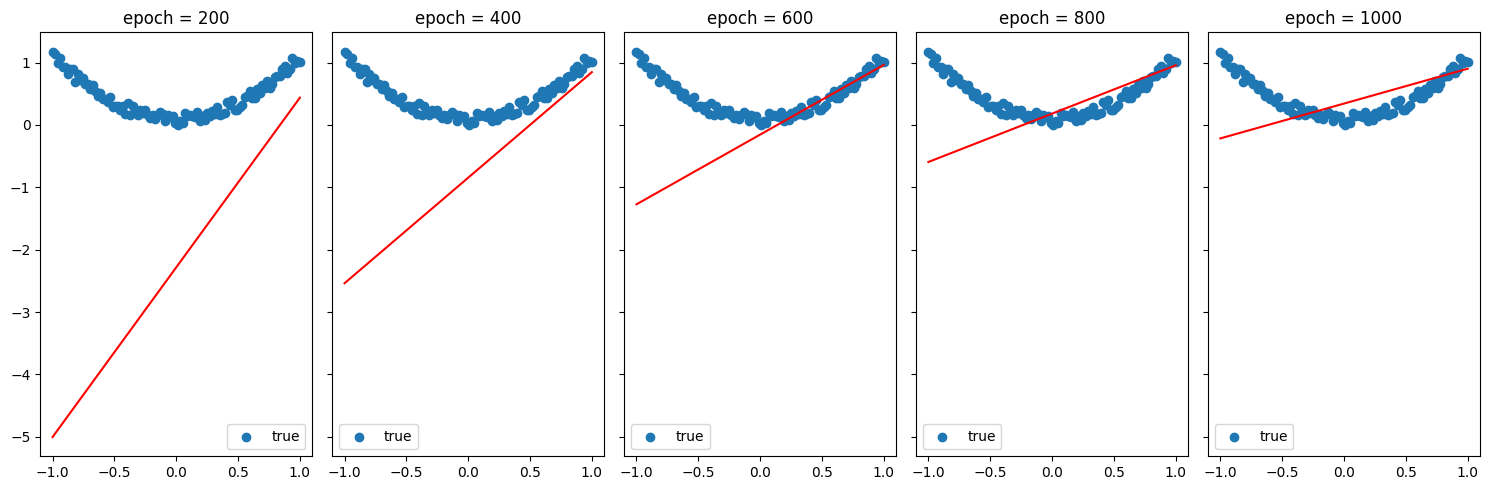

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15, 5))
for i, res in enumerate(results[1::2]):
  axes[i].plot(X, res[1], color='red')
  axes[i].set_title(f'epoch = {res[0]}')
  axes[i].scatter(X, y, label='true')
  axes[i].legend()
plt.tight_layout()
plt.show()

<p class="task" id="6"></p>

6\. Cоздайте нейросеть и решите задачу регрессии из предыдущей задачи.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

В процессе обучения сохраняйте прогнозы промежуточных моделей. Визуализируйте облако точек и промежуточные прогнозы не менее 4 промежуточных моделей. Визуализируйте прогнозы итоговой модели.

In [28]:
class ReLU:
  def forward(self, y_pred):
    return th.clip(y_pred, 0)

  def backward(self, inputs):
    return th.where(inputs >= 0, 1.0, 0.0)

In [44]:
lr = 0.01
crit = Loss()
X_const = th.cat([th.ones_like(X), X], dim=-1)
Lin = Linear(10, X_const.shape[1])
Lin2 = Linear(1, 10)
relu = ReLU()
results = []

for epoch in range(1, 1001):
  y_pred_1 = Lin.forward(X_const)
  y_pred_relu = relu.forward(y_pred_1)
  y_pred = Lin2.forward(y_pred_relu)
  loss = crit.forward(y_pred, y)
  if epoch % 100 == 0:
    results.append((epoch, y_pred))
    print(f'epoch = {epoch}, loss = {loss}')

  crit.backward(y_pred, y)
  Lin2.backward(y_pred_relu, crit.dpred)
  dldw2 = Lin2.dw
  Lin.backward(X_const, Lin2.dx * relu.backward(y_pred_1))
  dldw1 = Lin.dw

  Lin.weights -= lr * dldw1.T
  Lin2.weights -= lr * dldw2.T

epoch = 100, loss = 0.0297322366386652
epoch = 200, loss = 0.017615187913179398
epoch = 300, loss = 0.013918611221015453
epoch = 400, loss = 0.012268292717635632
epoch = 500, loss = 0.011093559674918652
epoch = 600, loss = 0.010058766230940819
epoch = 700, loss = 0.009219812229275703
epoch = 800, loss = 0.008456990122795105
epoch = 900, loss = 0.007847094908356667
epoch = 1000, loss = 0.007428097538650036


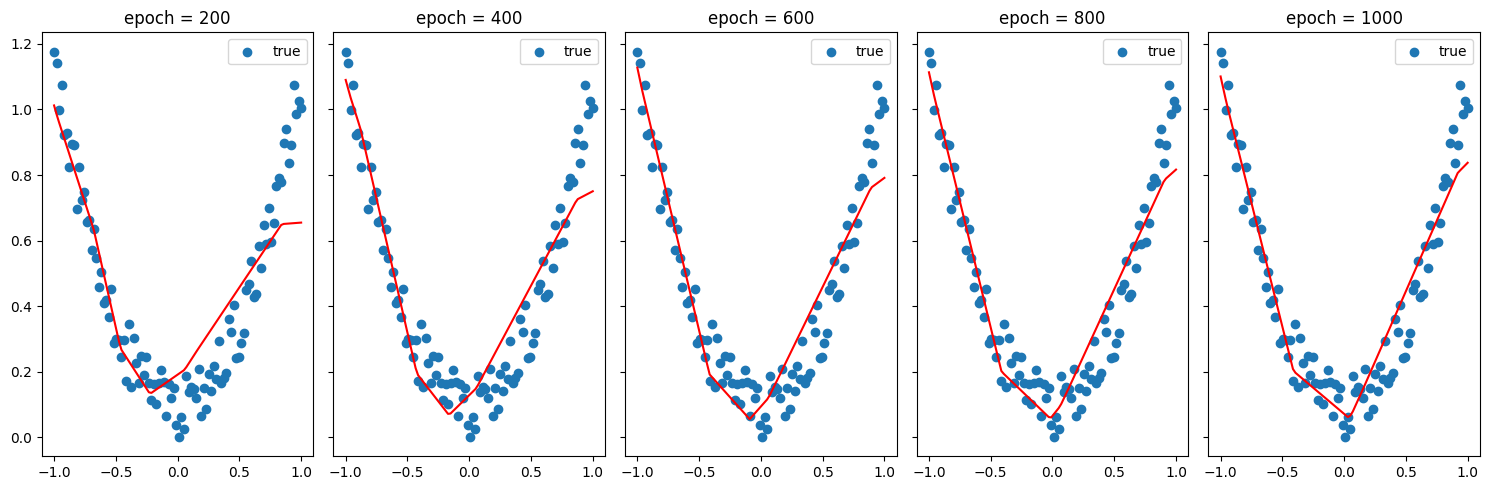

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(15, 5))
for i, res in enumerate(results[1::2]):
  axes[i].plot(X, res[1], color='red')
  axes[i].set_title(f'epoch = {res[0]}')
  axes[i].scatter(X, y, label='true')
  axes[i].legend()
plt.tight_layout()
plt.show()

## Обратная связь
- [х] Хочу получить обратную связь по решению